<a href="https://colab.research.google.com/github/alupo933/Python-Work-for-Bootcamp/blob/main/Analysis_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

1. Use KMeans to create various customer segments.
- Use an Elbow Plot of inertia
- And a plot of Silhouette Scores
- Choose a K based on the results.
2. Submit your notebook below.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
# Import the data
customer = pd.read_csv('/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/cust_seg.csv')
customer.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# Form the df with the columns we want for the clusters
cust_df = customer[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted', 'DebtIncomeRatio']]
cust_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


Clean the data

In [ ]:
# Look at the data
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [ ]:
cust_df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,1.000000,41.300000


Nothing looks out of the ordinary when we look at the means, mins, medians and max's.

In [ ]:
# Check for missing data
cust_df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

Since the isnull's are in the defaulted categery, which is binary, 0 for did not default and 1 for did default. We can pretty safely assume that the NaN values are for individual's who did not default. We are going to fill in those values with a 0.

In [ ]:
# Fill Missing Values in Defaulted with the value (0
cust_df = cust_df.fillna(0)

In [ ]:
# Check to see if the fill worked.
cust_df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Now that our data is clean we can start the KMeans clustering.

In [ ]:
# Instantiate a StandardScalar
scaler = StandardScaler()

# Fit and Transform the Data
scaled_cust_df = scaler.fit_transform(cust_df)

- Create an Elbow Plot of Inertia

Text(0, 0.5, '--Inertia--')

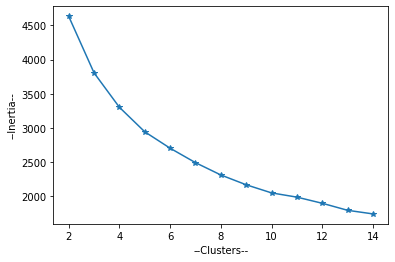

In [ ]:
# First I'll create an empty list of inertias
inertias = []

# Next I'll loop through k values of 2 - 15 and store the inertias in a list
for k in range(2,15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_cust_df)
  inertias.append(kmeans.inertia_)

# Visualize the scores
plt.plot(range(2,15), inertias, marker = '*')
plt.xlabel('--Clusters--')
plt.ylabel('--Inertia--')

In the Inertia's line plot, the bend in the elbow seems to be between 4 & 6. Indicating 4-6 would be good candidates for the number of clusters.

- Create a plot of Silhouette Scores

Text(0, 0.5, '--Silhouette Score--')

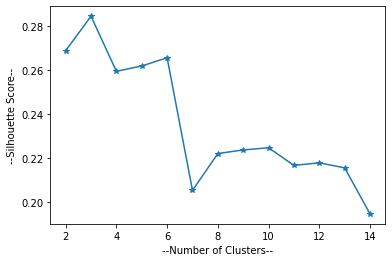

In [ ]:
# Save Silhouette Scores for vaious cluster numbers in a list
silhouette_scores = []

# Look for the k values of 2 - 15
for i in range(2,15):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(scaled_cust_df)
  silhouette_scores.append(silhouette_score(scaled_cust_df, kmeans.labels_))

# Visualize the Scores
plt.plot(range(2,15), silhouette_scores, marker = '*')
plt.xlabel('--Number of Clusters--')
plt.ylabel('--Silhouette Score--')

The above plot showes that 4 would be a good number of clusters, which is in the range of 4-6 that the Inertia plot showed us. 

The number of Clusters we are going to use is 4

- Chosen K based on Results:
#4

In [ ]:
# Fit the KMeans model with 4 clusters and display the silhouette score
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(scaled_cust_df)
silhouette_score(scaled_cust_df, kmeans4.labels_)

0.2594845486793858

The above silhouette score is a little low so we are going to see what fitting the KMeans model with 6 clusters does

In [ ]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(scaled_cust_df)
silhouette_score(scaled_cust_df, kmeans6.labels_)

0.26423563632094427

The silhouette score of 6 clusters is better as it is closer to 1. We are going to graph both clusters to visually compare the two

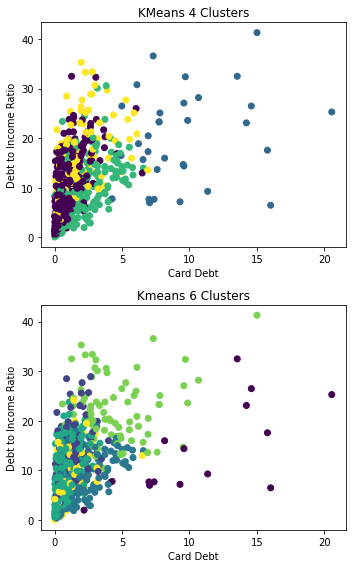

In [ ]:
# Save the cluster labels to the dataframe
cust_df['cluster4'] = kmeans4.labels_
cust_df['cluster6'] = kmeans6.labels_

# Visualize the Clusters
fig, axes = plt.subplots(2,1, figsize = (5,8))
axes[0].scatter(cust_df['Card Debt'], cust_df['DebtIncomeRatio'], c = cust_df['cluster4'])
axes[0].set_xlabel('Card Debt')
axes[0].set_ylabel('Debt to Income Ratio')
axes[0].set_title('KMeans 4 Clusters')
axes[1].scatter(cust_df['Card Debt'], cust_df['DebtIncomeRatio'], c = cust_df['cluster6'])
axes[1].set_xlabel('Card Debt')
axes[1].set_ylabel('Debt to Income Ratio')
axes[1].set_title('Kmeans 6 Clusters')
plt.tight_layout();

#Analysis of KMeans (Core)
For this task you are going to analyze the clusters you made in KMeans Exercise Part 1.  You can download the data here. The original data is from this data source.

Task
1. Make a copy of your code file from KMeans Exercise Part 1
2. Make bar graphs of the means of each feature for each cluster that you created in part 1 of the assignment.  For each plot the X axis should be the clusters and the y axis should be the mean values for each feature.

3. Write a description of each cluster, based on the graphs and tables you created.


Make bar graphs of the means of each feature for each cluster that you created in part 1 of the assignment. For each plot the X axis should be the clusters and the y axis should be the mean values for each feature.

In [ ]:
# Let's investigate the clusters
# Cluster the groups by their means and put cluster 6 as the first column
cluster_groups = cust_df.groupby('cluster6', as_index = False).mean()
cluster_groups

# drop the cluster 4 column
cluster_groups = cluster_groups.drop(columns='cluster4')
cluster_groups

,cluster6,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,0,47.733333,2.133333,22.666667,219.733333,10.740267,0.466667,14.040000
1,1,30.371212,1.803030,3.098485,28.515152,1.120720,1.000000,12.287121
2,2,42.508287,1.486188,17.160221,76.027624,1.839199,0.011050,8.162983
3,3,31.991549,1.301408,6.078873,30.028169,0.684732,0.000000,7.902817
4,4,37.629630,1.888889,9.938272,51.654321,4.477296,0.493827,22.262963
5,5,34.313953,3.488372,5.383721,46.616279,1.077000,0.023256,8.454651


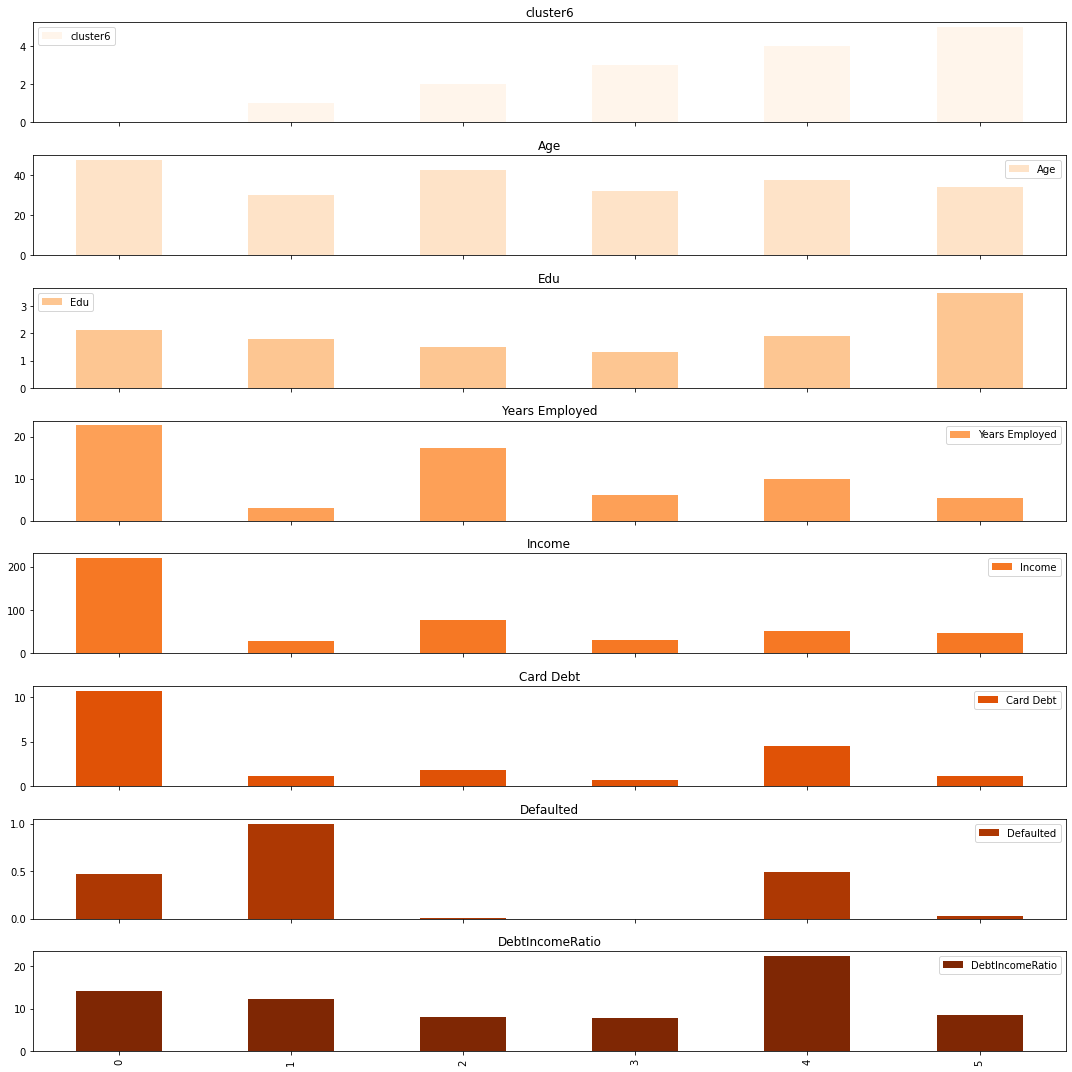

In [ ]:
from IPython.core.pylabtools import figsize
# Visualize the groupby
cluster_groups.plot(subplots = True, kind = 'bar', cmap = 'Oranges', figsize=(15,15))
plt.tight_layout()

Another way to plot and visualize the means of the clusters together is:

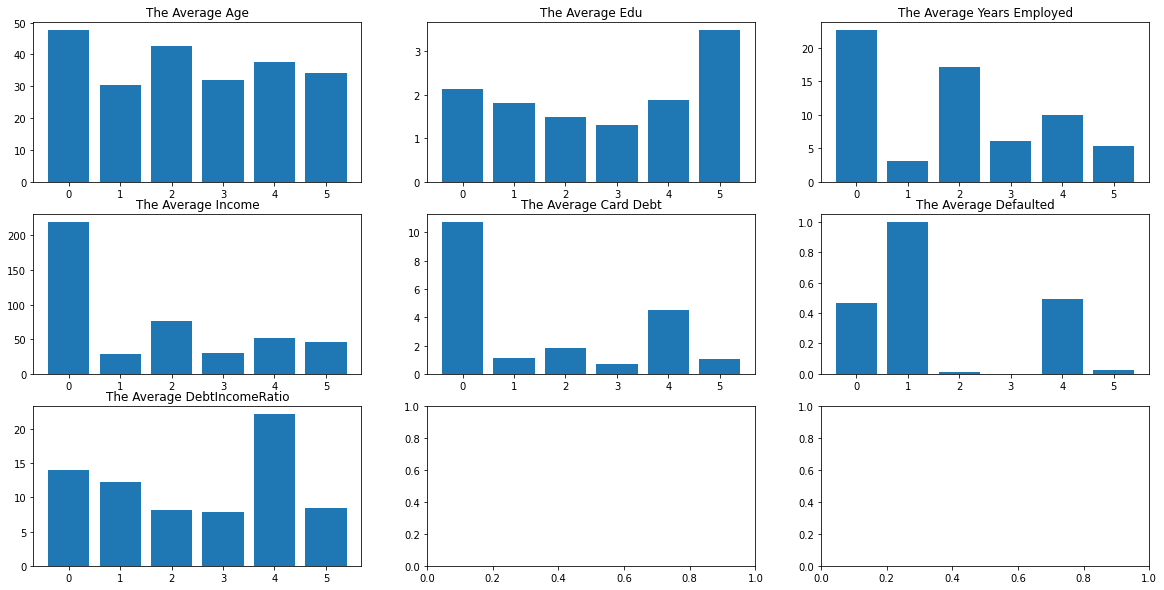

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (20,10))

# Use axes.ravel() to flatten the array to 12,1
axes = axes.ravel()

# Now I can loop over the columns 
for x, column in enumerate(cluster_groups.columns[1:]):
  axes[x].bar(cluster_groups['cluster6'], cluster_groups[column])
  axes[x].set_title(f'The Average {column}')

3. Write a description of each cluster, based on the graphs and tables you created.

# Cluster 0:
Cluster 0 appears to have the highest age which coorelates to the highest average years employed. This group also seems to have the highest amount of income, over $200k and card debt around $11k, but is in the middle of the pack when it comes to the average amunt of defaulted. This group also seems to be the second most educated of all 6 groups, behind cluster 5.


This group seems to be a group that has a lot of income and doesn't mind spending it. Focusing on company resources towards this group would be beneficial.

# Cluster 1:

Cluster 1 has the lowest average age, with a an education rate level in the middle of all the clusters. With the lowest average age, cluster 1 also has the lowest average amount of years employed. Cluster 1 has the lowest amount of income, the lowest amount of card debt, the most amount of individual's defaulted and the third highest debt to income ratio.

Due to the lack of income, and the highest amount of defaulting, this group may be the cluster that the company focus's the least amount of advertising attention to.

# Cluster 2:

Cluster 2 has the second highest age, with the second lowest eucation level, and the second longest amount of time employed. The individuals in this group also have the second highest average income around $75 with an average credit card debt of $2k. This group is one of the groups that has defaulted the least. Cluster 2 also has the lowest debt to income ratio.

This group seems to know what it's means are, and not spend outside of them.

# Cluster 3:

Cluster 3 has one of the lowest average ages and one of the lowest years employed. This group also has the lowest amount of education and the second lowest average income which is < $50k. They have the lowest amount of credit card debt and none in the group have defaulted. Their debt to income ratie is the lowest of all the clusters.

Cluster 3, just like clsuter 2, does not seem to spend outside of their means.

#Cluster 4: 

Cluster 4 has an average age of ~35 and is the third highet average education level with the third longest average of years employed. This group has an average income of ~ $50k with a moderate amount of card debt and has defaulted the second most of all the groups. This cluster also has the highest debt to income ratio by almost double the second group (cluster 0)

#Cluster 5: 

Cluster 5 has an average age of about 35 with the highest amount of education, and one of the lowest amount of years employed. Almost no one in this group has defaulted, and their average income is < $50k. This group also has one of the lowest debt to income ratios and one of the lowest amount of card debt.